# Telecommunication Company Churn Analysis-Classification Model
## 1. Business Understanding
- Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.
For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.

- In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

### Formulated question for our analysis

1. How does gender impact customer churn? Are there significant differences in churn rates between male and female customers?

2. Does the presence of a partner or dependents influence customer churn? Is there a relationship between marital status and churn behavior?

3. How does the length of tenure affect churn rates? Are customers with longer tenures less likely to churn compared to new customers?


4. What role do additional services (e.g., online security, tech support, streaming TV, etc.) play in reducing customer churn? Are customers with more services less likely to churn?

5. Is there a correlation between the contract term (month-to-month, one year, two years) and churn rates? Are customers on long-term contracts less likely to churn compared to those on month-to-month contracts?

### Hypothesis:

- H_o: Contract type does not influence customer churn
- H_a: Contract type affects customer churn

### To test this hypothesis we will conduct a chi square test to establish their association.

## 2. Data Understanding
### The data for this project is in a csv format. The following describes the columns present in the data.

- Gender -- Whether the customer is a male or a female

- SeniorCitizen -- Whether a customer is a senior citizen or not

- Partner -- Whether the customer has a partner or not (Yes, No)

- Dependents -- Whether the customer has dependents or not (Yes, No)

- Tenure -- Number of months the customer has stayed with the company

- Phone Service -- Whether the customer has a phone service or not (Yes, No)

- MultipleLines -- Whether the customer has multiple lines or not

- InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

- OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

- OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

- DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

- TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

- StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

- StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

- Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

- PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

- Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

- MonthlyCharges -- The amount charged to the customer monthly

- TotalCharges -- The total amount charged to the customer

- Churn -- Whether the customer churned or not (Yes or No)




In [8]:
# installations
%pip install squarify
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Python Libraries
### This section is to import all necessary libraries that will be used in the notebook

In [9]:
# Database access
import pyodbc
from dotenv import dotenv_values 

# Data handling and manipulation
import pandas as pd 
import numpy as np 

# Visualization
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use("ggplot")
import seaborn as sns 
sns.set_style('whitegrid') # Set the style to 'whitegrid'
import plotly.express as px
import squarify

# statistical analysis 

from scipy import stats

from scipy.stats import pearsonr
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import chi2_contingency

#display all columns and rows 
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# filter warnings
import warnings
warnings.filterwarnings('ignore')

## 3. Data preparation
### 3.1: Data Loading
### This is how the first dataset was retrieved from the SQL Server database. The second and third datasets were downloaded and imported.

In [10]:
# Load environment variables from .env file into a dictionary
environment_variables=dotenv_values('.env') 

In [11]:
# Get the values for the credentials you set in the '.env' file
database=environment_variables.get("database")
server=environment_variables.get("server")
username=environment_variables.get("username")
password=environment_variables.get("password")

In [12]:
# establish a connection to the SQL Server database using the specified parameters.
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [13]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary
connection=pyodbc.connect(connection_string)

In [14]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 
query="Select * from dbo.LP2_Telco_churn_first_3000"
data=pd.read_sql(query,connection)

In [15]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
5,9305-CDSKC,Female,False,False,False,8,True,True,Fiber optic,False,False,True,False,True,True,Month-to-month,True,Electronic check,99.650002,820.500000,True
6,1452-KIOVK,Male,False,False,True,22,True,True,Fiber optic,False,True,False,False,True,False,Month-to-month,True,Credit card (automatic),89.099998,1949.400024,False
7,6713-OKOMC,Female,False,False,False,10,False,None,DSL,True,False,False,False,False,False,Month-to-month,False,Mailed check,29.750000,301.899994,False
8,7892-POOKP,Female,False,True,False,28,True,True,Fiber optic,False,False,True,True,True,True,Month-to-month,True,Electronic check,104.800003,3046.050049,True
9,6388-TABGU,Male,False,False,True,62,True,False,DSL,True,True,False,False,False,False,One year,False,Bank transfer (automatic),56.150002,3487.949951,False


In [16]:
# Define the file path to save the CSV file on your desktop
file_path = "C:/Users/user/Desktop/LP2/Telco-Churn-Analysis/Datasets/train1.csv"
# Save the data as a CSV file
data.to_csv(file_path,  index=False)

In [17]:
# Get the dimensions of the DataFrame
print(f'rows = {data.shape[0]}\ncolumns = {data.shape[1]}')

rows = 3000
columns = 21


In [18]:
# get the the info of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


### we can see that there are missing values in some of the columns

In [19]:
# Generate descriptive statistics
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,3000.000000,3000.000000,2995.000000
mean,32.527333,65.347400,2301.278315
std,24.637768,30.137053,2274.987884
min,0.000000,18.400000,18.799999
25%,9.000000,35.787499,415.250000
50%,29.000000,70.900002,1404.650024
75%,56.000000,90.262501,3868.725098
max,72.000000,118.650002,8564.750000


In [20]:
# check the number of unique values in each attribute
data.nunique()

customerID          3000
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1198
TotalCharges        2893
Churn                  2
dtype: int64

In [21]:
data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [22]:
# loading the second dataset which is also the train set

data2=pd.read_excel(r'C:\Users\user\Desktop\LP2\Telco-Churn-Analysis\Datasets\Telco-churn-second-2000.xlsx')
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [23]:
data2.shape

(2000, 20)

In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


### we can see there are no missing values in the test dataset

In [25]:
data2.nunique()

customerID          2000
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges       986
TotalCharges        1930
dtype: int64

In [26]:
# Define the file path to save the CSV file on your desktop
file_path = "C:/Users/user/Desktop/LP2/Telco-Churn-Analysis/Datasets/test.csv"
# Save the data as a CSV file
data2.to_csv(file_path,  index=False)

In [27]:
# loading the third dataset which is part of the training set
data3=pd.read_csv(r'C:\Users\user\Desktop\LP2\Telco-Churn-Analysis\Datasets\LP2_Telco-churn-last-2000.csv')
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [28]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


### the third dataset does not also have null values

In [29]:
data3.nunique()

customerID          2043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1029
TotalCharges        1991
Churn                  2
dtype: int64

In [30]:
# Define the file path to save the CSV file on your desktop
file_path = "C:/Users/user/Desktop/LP2/Telco-Churn-Analysis/Datasets/train2.csv"
# Save the data as a CSV file
data3.to_csv(file_path,  index=False)

In [31]:
# Display the info of data1
print("Info of data1:")
print(data.info())

# Display the info of data2
print("\nInfo of data2:")
print(data3.info())

Info of data1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-

## 3.2 Exploratory Data Analysis: EDA
### in this section we inspect the datasets in depth and conduct a univariate, bivariate and multivariate analysis and test the hypothesis to further understand the patterns and trends in the dataset.

### lets look at the unique values of each column in the training datasets and handle inconsistencies to merge the two datasets

In [32]:
# Compare the two DataFrames data and data3 side-by-side

# Create custom summary DataFrames for each DataFrame
summary_data = pd.DataFrame({'Column Name': data.columns, 'Data Type': data.dtypes, 'Non-Null Count': data.count()})
summary_data3 = pd.DataFrame({'Column Name': data3.columns, 'Data Type': data3.dtypes, 'Non-Null Count': data3.count()})

# Set 'Column Name' as the index for both summary DataFrames
summary_data.set_index('Column Name', inplace=True)
summary_data3.set_index('Column Name', inplace=True)

# Concatenate the two summary DataFrames side by side
comparison = pd.concat([summary_data, summary_data3], axis=1, keys=['DataFrame 1', 'DataFrame 3'])

# Print the side-by-side comparison
print(comparison)

                 DataFrame 1                DataFrame 3               
                   Data Type Non-Null Count   Data Type Non-Null Count
Column Name                                                           
customerID            object           3000      object           2043
gender                object           3000      object           2043
SeniorCitizen           bool           3000       int64           2043
Partner                 bool           3000      object           2043
Dependents              bool           3000      object           2043
tenure                 int64           3000       int64           2043
PhoneService            bool           3000      object           2043
MultipleLines         object           2731      object           2043
InternetService       object           3000      object           2043
OnlineSecurity        object           2349      object           2043
OnlineBackup          object           2349      object           2043
Device

In [33]:
# lets first drop the customer ID column as we do need it for this analysis
data=data.drop('customerID', axis=1)
data3=data3.drop('customerID', axis=1)

In [34]:
# replacing the encoded column values with No and Yes to match with the first training set
data3['SeniorCitizen']=data3['SeniorCitizen'].replace([0,1],['No','Yes'])
data3['SeniorCitizen'].value_counts()

SeniorCitizen
No     1699
Yes     344
Name: count, dtype: int64

In [35]:
#  lets convert boolean-like values (e.g., 'True' and 'False') to more human-readable forms (e.g., 'Yes' and 'No') to match with the second dataset
data['SeniorCitizen'] = data['SeniorCitizen'].replace([False,True], ['No', 'Yes'])
data['Partner'] = data['Partner'].replace([False, True],['No','Yes'])
data['Dependents'] = data['Dependents'].replace([False, True],['No','Yes'])
data['PhoneService'] = data['PhoneService'].replace([False, True],['No','Yes'])
data['MultipleLines'] = data['MultipleLines'].replace([False, True],['No','Yes'])
data['OnlineSecurity'] = data['OnlineSecurity'].replace([False, True],['No','Yes'])
data['OnlineBackup'] = data['OnlineBackup'].replace([False, True],['No','Yes'])
data['DeviceProtection'] = data['DeviceProtection'].replace([False, True],['No','Yes'])
data['TechSupport'] = data['TechSupport'].replace([False, True],['No','Yes'])
data['StreamingTV'] = data['StreamingTV'].replace([False, True],['No','Yes'])
data['StreamingMovies'] = data['StreamingMovies'].replace([False, True],['No','Yes'])
data['PaperlessBilling'] = data['PaperlessBilling'].replace([False, True],['No','Yes'])
data['Churn'] = data['Churn'].replace([False, True],['No','Yes'])

In [36]:
print(data['SeniorCitizen'].value_counts())
print(data3['SeniorCitizen'].value_counts())
print(data['Partner'].value_counts())
print(data3['Partner'].value_counts())
print(data['Dependents'].value_counts())
print(data3['Dependents'].value_counts())
print(data['PhoneService'].value_counts())
print(data3['PhoneService'].value_counts())
print(data['MultipleLines'].value_counts())
print(data3['MultipleLines'].value_counts())
print(data['OnlineSecurity'].value_counts())
print(data3['OnlineSecurity'].value_counts())
print(data['DeviceProtection'].value_counts())
print(data3['DeviceProtection'].value_counts())
print(data['TechSupport'].value_counts())
print(data3['TechSupport'].value_counts())
print(data['StreamingTV'].value_counts())
print(data3['StreamingTV'].value_counts())
print(data['PaperlessBilling'].value_counts())
print(data3['PaperlessBilling'].value_counts())
print(data['Churn'].value_counts())
print(data3['Churn'].value_counts())


SeniorCitizen
No     2525
Yes     475
Name: count, dtype: int64
SeniorCitizen
No     1699
Yes     344
Name: count, dtype: int64
Partner
No     1538
Yes    1462
Name: count, dtype: int64
Partner
No     1047
Yes     996
Name: count, dtype: int64
Dependents
No     2070
Yes     930
Name: count, dtype: int64
Dependents
No     1412
Yes     631
Name: count, dtype: int64
PhoneService
Yes    2731
No      269
Name: count, dtype: int64
PhoneService
Yes    1823
No      220
Name: count, dtype: int64
MultipleLines
No     1437
Yes    1294
Name: count, dtype: int64
MultipleLines
No                  987
Yes                 836
No phone service    220
Name: count, dtype: int64
OnlineSecurity
No     1478
Yes     871
Name: count, dtype: int64
OnlineSecurity
No                     1029
Yes                     585
No internet service     429
Name: count, dtype: int64
DeviceProtection
No     1296
Yes    1053
Name: count, dtype: int64
DeviceProtection
No                     923
Yes                    691
No i

In [37]:
# Confirm the dtypes of the two DataFrames data and data3 side-by-side

# Create custom summary DataFrames for each DataFrame
summary_data = pd.DataFrame({'Column Name': data.columns, 'Data Type': data.dtypes, 'Non-Null Count': data.count()})
summary_data3 = pd.DataFrame({'Column Name': data3.columns, 'Data Type': data3.dtypes, 'Non-Null Count': data3.count()})

# Set 'Column Name' as the index for both summary DataFrames
summary_data.set_index('Column Name', inplace=True)
summary_data3.set_index('Column Name', inplace=True)

# Concatenate the two summary DataFrames side by side
comparison = pd.concat([summary_data, summary_data3], axis=1, keys=['DataFrame 1', 'DataFrame 3'])

# Print the side-by-side comparison
print(comparison)

                 DataFrame 1                DataFrame 3               
                   Data Type Non-Null Count   Data Type Non-Null Count
Column Name                                                           
gender                object           3000      object           2043
SeniorCitizen         object           3000      object           2043
Partner               object           3000      object           2043
Dependents            object           3000      object           2043
tenure                 int64           3000       int64           2043
PhoneService          object           3000      object           2043
MultipleLines         object           2731      object           2043
InternetService       object           3000      object           2043
OnlineSecurity        object           2349      object           2043
OnlineBackup          object           2349      object           2043
DeviceProtection      object           2349      object           2043
TechSu

In [38]:
# lets convert the TotalCharges column to a float
# Replace empty strings with NaN
data3['TotalCharges'] = data3['TotalCharges'].replace(' ', np.nan)

# Convert the 'TotalCharges' column to float data type
data3['TotalCharges'] = data3['TotalCharges'].astype('float64')

In [39]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2043 non-null   object 
 1   SeniorCitizen     2043 non-null   object 
 2   Partner           2043 non-null   object 
 3   Dependents        2043 non-null   object 
 4   tenure            2043 non-null   int64  
 5   PhoneService      2043 non-null   object 
 6   MultipleLines     2043 non-null   object 
 7   InternetService   2043 non-null   object 
 8   OnlineSecurity    2043 non-null   object 
 9   OnlineBackup      2043 non-null   object 
 10  DeviceProtection  2043 non-null   object 
 11  TechSupport       2043 non-null   object 
 12  StreamingTV       2043 non-null   object 
 13  StreamingMovies   2043 non-null   object 
 14  Contract          2043 non-null   object 
 15  PaperlessBilling  2043 non-null   object 
 16  PaymentMethod     2043 non-null   object 


## imputing missing values

In [40]:
# lets look at the missing values in the first training set
data.isna().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [41]:
# imputing the missing values
obj=data.select_dtypes(include='object')
obj.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [42]:
obj=['MultipleLines','OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Churn']

In [43]:
# use mode to impute missing value in object columns
data[obj]=data[obj].fillna(data[obj].mode().iloc[0])

In [44]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
Churn               0
dtype: int64

In [45]:
# lets look at the missing values in the second training set
data3.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64

In [46]:
# lets drop the missing values in totalcharges in both training datasets
data=data.dropna(subset='TotalCharges')
data3=data3.dropna(subset='TotalCharges')

In [47]:
# now lets merge the training dataset and do a univariate, bivariate and multivariate analysis
df_train=pd.concat([data,data3])

In [48]:
# save the merged dataset
# Define the file path to save the CSV file on your desktop
file_path = "C:/Users/user/Desktop/LP2/Telco-Churn-Analysis/Datasets/df_train.csv"
df_train.to_csv(file_path,  index=False)

In [49]:
# lets check the missing values in the merged train datasets
df_train.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Handle outliers

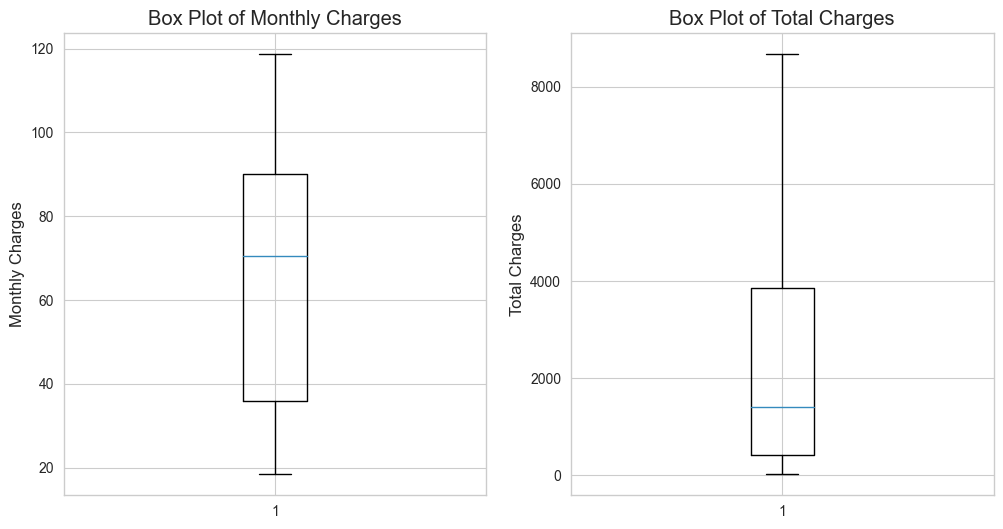

In [50]:
# we have handled the null values in training data now lets look at the outliers
# lets Create a box plot to have a look at the outliers in the monthly charges attribute

# Create a figure with 1 row and 2 columns for the subplots
plt.figure(figsize=(12, 6))

# Create the first subplot for Monthly Charges
plt.subplot(1, 2, 1)
plt.boxplot(df_train['MonthlyCharges'])
plt.ylabel('Monthly Charges')
plt.title('Box Plot of Monthly Charges')

# Create the second subplot for Total Charges
plt.subplot(1, 2, 2)
plt.boxplot(df_train['TotalCharges'])
plt.ylabel('Total Charges')
plt.title('Box Plot of Total Charges')

# Show the plots
plt.show()



In [51]:
# Calculate the 25th and 75th percentiles (Q1 and Q3) of MonthlyCharges
Q1 = df_train['MonthlyCharges'].quantile(0.25)
Q3 = df_train['MonthlyCharges'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in MonthlyCharges
num_outliers = df_train[(df_train['MonthlyCharges'] < lower_bound) | (df_train['MonthlyCharges'] > upper_bound)].shape[0]

# Print the number of outliers
print("Number of outliers in MonthlyCharges:", num_outliers)


Number of outliers in MonthlyCharges: 0


In [52]:
# Calculate the 25th and 75th percentiles (Q1 and Q3) of TotalCharges
Q1 = df_train['TotalCharges'].quantile(0.25)
Q3 = df_train['TotalCharges'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in TotalCharges
num_outliers = df_train[(df_train['TotalCharges'] < lower_bound) | (df_train['TotalCharges'] > upper_bound)].shape[0]

# Print the number of outliers
print("Number of outliers in TotalCharges:", num_outliers)


Number of outliers in TotalCharges: 0


## Handle duplicates

In [53]:
# now that we have confirmed that there are no outliers, lets look at the duplicates
print("Number of duplicates in train dataset:", df_train.duplicated().sum())

Number of duplicates in train dataset: 10


In [54]:
# lets have a look at the duplicates
# check the duplicate rows
df_train.loc[df_train.duplicated()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,No,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.700001,45.700001,Yes
1338,Male,No,No,No,1,Yes,No,No,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,20.150000,20.150000,Yes
1491,Female,No,No,No,1,Yes,No,No,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,19.549999,19.549999,No
1739,Male,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.900002,69.900002,Yes
1932,Male,No,No,No,1,Yes,No,No,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,20.200001,20.200001,No
2713,Male,No,No,No,1,Yes,No,No,No,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,20.450001,20.450001,No
2892,Male,No,No,No,1,Yes,No,No,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,20.450001,20.450001,No
759,Female,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.150000,70.150000,Yes
1764,Female,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.200000,69.200000,Yes
1774,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.650000,19.650000,No


In [55]:
# locking rows without duplicates
# remove duplicate rows based on the specified subset of columns
df_train=df_train.loc[~df_train.duplicated(subset=['MonthlyCharges','TotalCharges'])].reset_index(drop=True).copy()

In [56]:
# lets confirm weather we still have any duplicates
df_train.duplicated().sum()

0

In [57]:
# save the clean train dataset
# Define the file path to save the CSV file on your desktop
file_path = "C:/Users/user/Desktop/LP2/Telco-Churn-Analysis/Datasets/df_train_clean.csv"
df_train.to_csv(file_path,  index=False)

In [58]:
# lets take a look at the test dataset
# Confirm the dtypes of the training and test data side-by-side

# Create custom summary DataFrames for each DataFrame
summary_train = pd.DataFrame({'Column Name': df_train.columns, 'Data Type': df_train.dtypes, 'Non-Null Count': df_train.count()})
summary_test = pd.DataFrame({'Column Name': data2.columns, 'Data Type': data2.dtypes, 'Non-Null Count': data2.count()})

# Set 'Column Name' as the index for both summary DataFrames
summary_train.set_index('Column Name', inplace=True)
summary_test.set_index('Column Name', inplace=True)

# Concatenate the two summary DataFrames side by side
comparison = pd.concat([summary_train, summary_test], axis=1, keys=['DataFrame 1', 'DataFrame 2'])

# Print the side-by-side comparison
print(comparison)


                 DataFrame 1                DataFrame 2               
                   Data Type Non-Null Count   Data Type Non-Null Count
Column Name                                                           
gender                object         4928.0      object         2000.0
SeniorCitizen         object         4928.0       int64         2000.0
Partner               object         4928.0      object         2000.0
Dependents            object         4928.0      object         2000.0
tenure                 int64         4928.0       int64         2000.0
PhoneService          object         4928.0      object         2000.0
MultipleLines         object         4928.0      object         2000.0
InternetService       object         4928.0      object         2000.0
OnlineSecurity        object         4928.0      object         2000.0
OnlineBackup          object         4928.0      object         2000.0
DeviceProtection      object         4928.0      object         2000.0
TechSu

In [59]:
# lets convert the test dataset TotalCharges column to a float
# Replace empty strings with NaN
data2['TotalCharges'] = data2['TotalCharges'].replace(' ', np.nan)

# Convert the 'TotalCharges' column to float data type
data2['TotalCharges'] = data2['TotalCharges'].astype('float64')

In [60]:
data2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [61]:
# lets drop the missing values in totalcharges in the datasets
data2=data2.dropna(subset='TotalCharges')

In [62]:
# Drop the 'customerID' column from data2
data2.drop('customerID', axis=1, inplace=True)


In [63]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1997 non-null   object 
 1   SeniorCitizen     1997 non-null   int64  
 2   Partner           1997 non-null   object 
 3   Dependents        1997 non-null   object 
 4   tenure            1997 non-null   int64  
 5   PhoneService      1997 non-null   object 
 6   MultipleLines     1997 non-null   object 
 7   InternetService   1997 non-null   object 
 8   OnlineSecurity    1997 non-null   object 
 9   OnlineBackup      1997 non-null   object 
 10  DeviceProtection  1997 non-null   object 
 11  TechSupport       1997 non-null   object 
 12  StreamingTV       1997 non-null   object 
 13  StreamingMovies   1997 non-null   object 
 14  Contract          1997 non-null   object 
 15  PaperlessBilling  1997 non-null   object 
 16  PaymentMethod     1997 non-null   object 
 17  

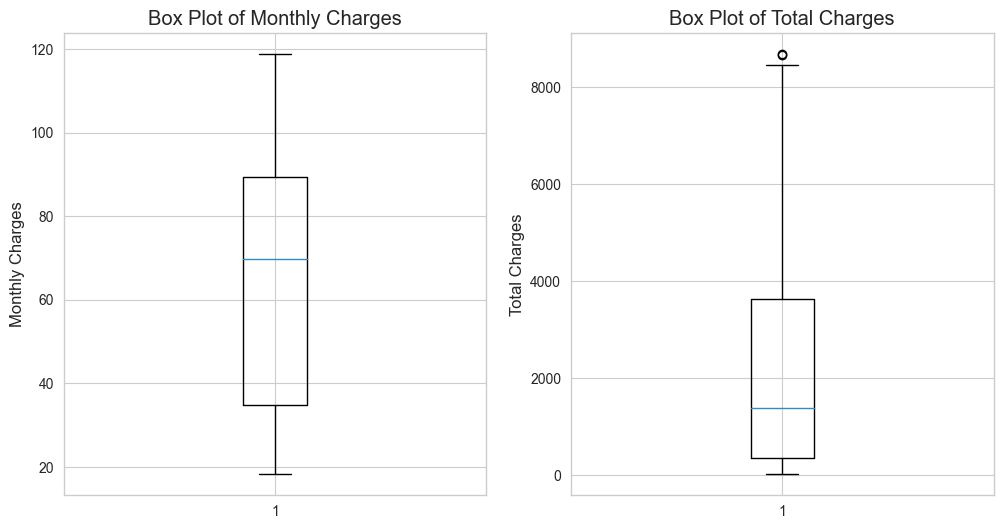

In [64]:
# we have handled the null values in test data now lets look at the outliers
# lets Create a box plot to have a look at the outliers in the monthly charges attribute

# Create a figure with 1 row and 2 columns for the subplots
plt.figure(figsize=(12, 6))

# Create the first subplot for Monthly Charges
plt.subplot(1, 2, 1)
plt.boxplot(data2['MonthlyCharges'])
plt.ylabel('Monthly Charges')
plt.title('Box Plot of Monthly Charges')

# Create the second subplot for Total Charges
plt.subplot(1, 2, 2)
plt.boxplot(data2['TotalCharges'])
plt.ylabel('Total Charges')
plt.title('Box Plot of Total Charges')

# Show the plots
plt.show()


In [65]:
# Calculate the 25th and 75th percentiles (Q1 and Q3) of TotalCharges
Q1 = data2['TotalCharges'].quantile(0.25)
Q3 = data2['TotalCharges'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in TotalCharges
num_outliers = data2[(data2['TotalCharges'] < lower_bound) | (data2['TotalCharges'] > upper_bound)].shape[0]

# Print the number of outliers
print("Number of outliers in TotalCharges:", num_outliers)


Number of outliers in TotalCharges: 2


In [66]:
# lets remove the outliers in totalcharges by replacing with median
data2 = data2[(data2['TotalCharges'] >= lower_bound) & (data2['TotalCharges'] <= upper_bound)]

In [67]:
# now lets look at the duplicates
print("Number of duplicates:", data2.duplicated().sum())

Number of duplicates: 3


In [68]:
# lets remove the duplicates
# locking rows without duplicates
# remove duplicate rows based on the specified subset of columns
data2=data2.loc[~data2.duplicated(subset=['MonthlyCharges','TotalCharges'])].reset_index(drop=True).copy()

In [69]:
# now lets confirm weather we still have any duplicates
print("Number of duplicates:", data2.duplicated().sum())

Number of duplicates: 0


In [70]:
# save the clean test dataset
# Define the file path to save the CSV file on your desktop
file_path = "C:/Users/user/Desktop/LP2/Telco-Churn-Analysis/Datasets/df_test.csv"
data2.to_csv(file_path,  index=False)

## 3.3 Univariate Analysis
### 3.3.1 Analysis of tenure attribute

In [71]:
# lets look at the statistics
df_train['tenure'].describe()

count    4928.000000
mean       33.315138
std        24.327628
min         1.000000
25%        10.000000
50%        30.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

In [72]:
## categorization of tenure group to reveal trends and insights on customer churn across different tenure groups
# Define the bins for grouping tenure
bins = [0, 12, 24, 36, 48, 60, 1000]  

# Define labels for the bins
labels = ['0-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '61+ months']

# Group 'tenure' into bins
df_train['tenure_group'] = pd.cut(df_train['tenure'], bins=bins, labels=labels, right=False)
df_train['tenure_group'].value_counts()

tenure_group
0-12 months     1338
61+ months      1078
13-24 months     762
25-36 months     628
49-60 months     579
37-48 months     543
Name: count, dtype: int64

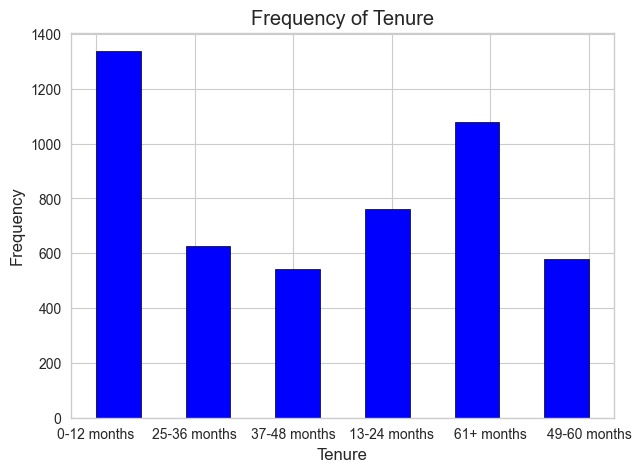

In [73]:
# now lets show the frequency distribution
plt.figure(figsize=(7,5))
plt.hist(df_train['tenure_group'],bins=11, color='blue', edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Frequency of Tenure')
plt.show();

### we can see that most of the customers have stayed for less than one 12 months

### Analysis of churn attiribute

In [74]:
churn_count = df_train['Churn'].value_counts()
churn_count

Churn
No     3648
Yes    1280
Name: count, dtype: int64

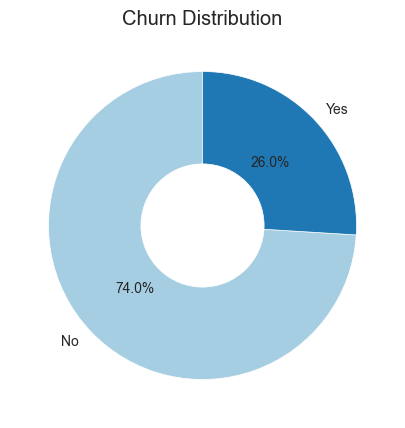

In [75]:
# lets see the distribution of churn
fig, ax = plt.subplots(figsize=(10, 5))
# Draw the outer pie chart
outer_colors = plt.cm.Paired(range(len(churn_count)))
ax.pie(churn_count.values, labels=churn_count.index, colors=outer_colors, radius=1, autopct='%1.1f%%', startangle=90)
# Draw the inner pie chart to create the doughnut effect
ax.pie([1], colors='white', radius=0.4)
ax.set(aspect='equal')
plt.title('Churn Distribution')
plt.show()

### we can see that we have an imbalanced data as 74% of the total customers churned while 26% did not churn. this implies that we have to balance our data before training the model

### Analysis of total charges

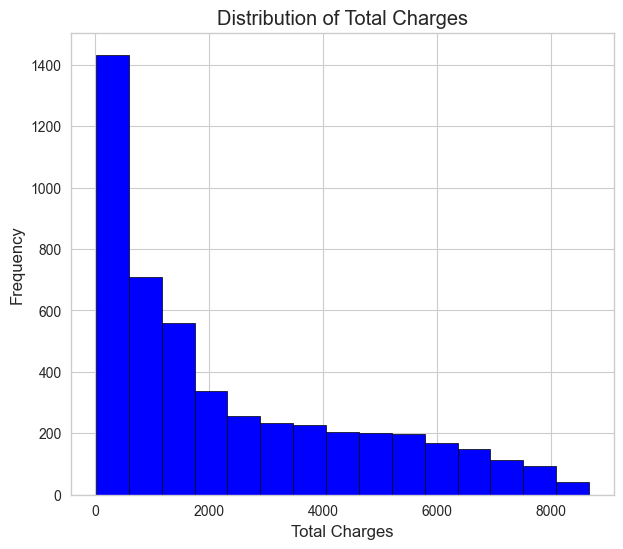

In [76]:
#Visualization of frequency distribution of total charges column

plt.figure(figsize=(7,6))
plt.hist(df_train['TotalCharges'], bins=15, color='b', edgecolor='black')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Total Charges')
plt.show()

### The distribution plot shows in detail the skewness of the total charges attribute of the dataset and it indicates a positively skewed distribution.

### Analysis of Gender Attribute

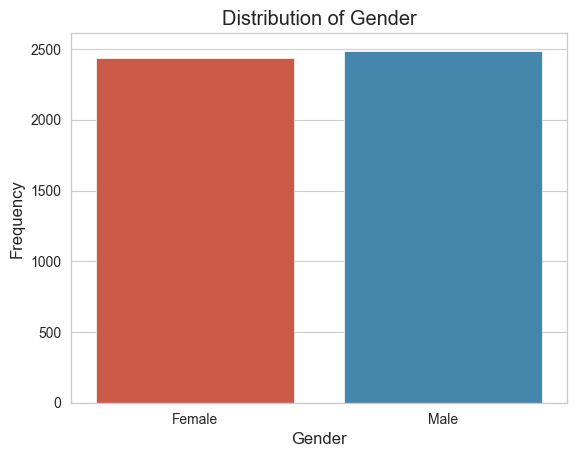

In [77]:
#Plot of Gender Distribution
sns.countplot(x=df_train['gender'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()

### Gender distribution is almost even, with Males exceeding females by a very small margin

### Analysis of payment method

In [78]:
# Visualization of Payment Method column

PaymentMethod_Count = df_train['PaymentMethod'].value_counts().sort_values(ascending=True)
PaymentMethod_Count

PaymentMethod
Mailed check                 1063
Credit card (automatic)      1085
Bank transfer (automatic)    1115
Electronic check             1665
Name: count, dtype: int64

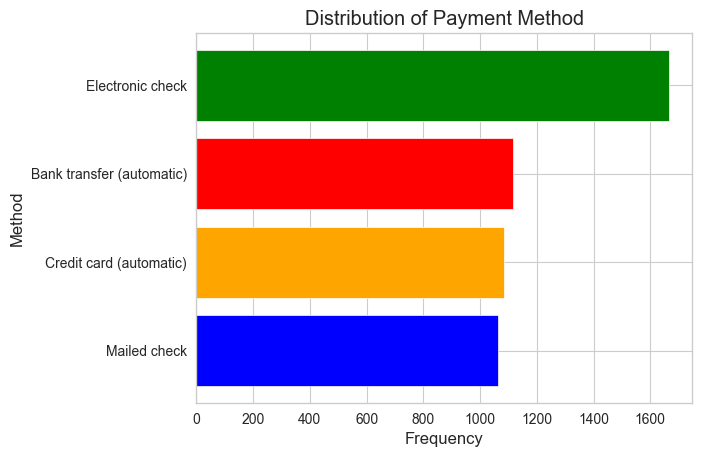

In [79]:
#Use of horizontal bar plot for visualization
c = ['blue', 'orange','red','green']
plt.barh(PaymentMethod_Count.index, PaymentMethod_Count.values, color = c)
plt.xlabel('Frequency')
plt.ylabel('Method')
plt.title('Distribution of Payment Method')
plt.yticks(rotation=0)
plt.show();

### Visualization shows us that majority of the customers preffered Electronic Check as a method of payment.

### Analysis of internet service

In [80]:
# now lets have a look at the distribution of internet service providers
df_train['InternetService'].replace('No', 'No Internet Service', inplace=True)
InternetService_Count = df_train['InternetService'].value_counts().sort_values(ascending=True)
InternetService_Count 

InternetService
No Internet Service    1019
DSL                    1686
Fiber optic            2223
Name: count, dtype: int64

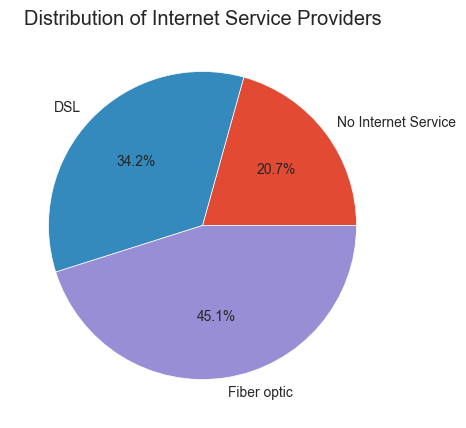

In [81]:
#Plotting a pie chart to visualize the internet service providers
plt.figure(figsize=(5, 5))
plt.pie(InternetService_Count, labels=InternetService_Count.index, autopct='%1.1f%%')
plt.title('Distribution of Internet Service Providers')
plt.show();

### Majority of customer's preffered Fibre optic for internet service provision

## Bivariate Analysis

### 1. How does gender impact customer churn? Are there significant differences in churn rates between male and female   customers?

In [82]:
# first lets group our data by gender and churn
grouped=pd.crosstab(df_train['gender'],df_train.Churn)
grouped['Churn_rate']=(grouped['Yes']/ (grouped['Yes'] + grouped['No']))*100
print(grouped['Churn_rate'])


gender
Female    26.065574
Male      25.884244
Name: Churn_rate, dtype: float64


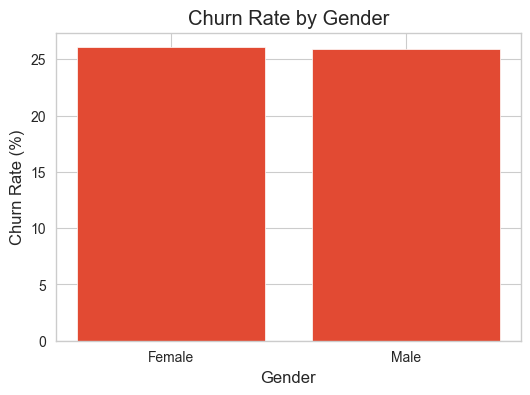

In [83]:
# Plotting 'gender' against churn rate
plt.figure(figsize=(6, 4))
plt.bar(grouped.index, grouped['Churn_rate'])
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Gender')
plt.show()

### From the visualization we can see that there is no significant differences in churn rates between male and female   customers where 25.9% male churned while 26.1% female churned.

### 2. Does the presence of a partner or dependents influence customer churn? Is there a relationship between marital status and churn behavior?

In [84]:
# first lets group our data by partner and churn
grouped=pd.crosstab(df_train['Partner'],df_train.Churn)
grouped['Churn_rate']=(grouped['Yes']/ (grouped['Yes'] + grouped['No']))*100
print(grouped)

# lets group our data by dependents and churn
grouped2=pd.crosstab(df_train['Dependents'],df_train.Churn)
grouped2['Churn_rate']=(grouped2['Yes']/ (grouped2['Yes'] + grouped2['No']))*100
print(grouped2)

Churn      No  Yes  Churn_rate
Partner                       
No       1698  794   31.861958
Yes      1950  486   19.950739
Churn         No   Yes  Churn_rate
Dependents                        
No          2344  1054   31.018246
Yes         1304   226   14.771242


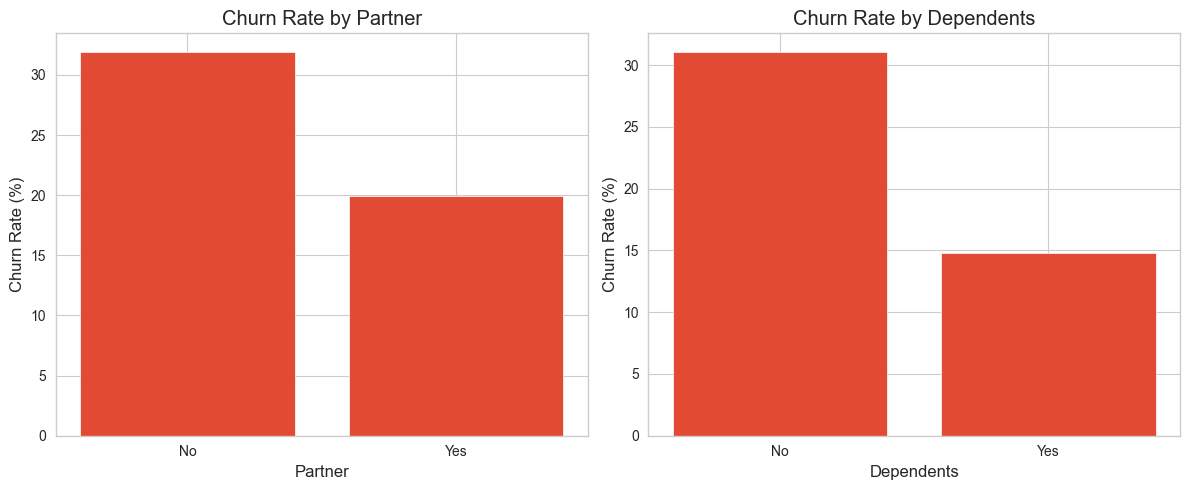

In [85]:
# Create a figure with two subplots (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting 'Partner' against churn rate
axes[0].bar(grouped.index, grouped['Churn_rate'])
axes[0].set_xlabel('Partner')
axes[0].set_ylabel('Churn Rate (%)')
axes[0].set_title('Churn Rate by Partner')

# Plotting 'Dependents' against churn rate
axes[1].bar(grouped2.index, grouped2['Churn_rate'])
axes[1].set_xlabel('Dependents')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_title('Churn Rate by Dependents')

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()


### From the visualizations we can see that the presence of a partner or dependents do not influence customer churn as those without partners churned more compared to with partners. similarly, those without dependants churned more compared to those with dependants. we can deduce that customers in a family set up tend to stay longer compared to those without.

### 3. How does the length of tenure affect churn rates? Are customers with longer tenures less likely to churn compared to new customers?

In [86]:
# first lets group our data by tenure group and churn
grouped3=pd.crosstab(df_train['tenure_group'],df_train.Churn)
grouped3['Churn_rate']=(grouped3['Yes']/ (grouped3['Yes'] + grouped3['No']))*100
print(grouped3)

Churn           No  Yes  Churn_rate
tenure_group                       
0-12 months    690  648   48.430493
13-24 months   532  230   30.183727
25-36 months   496  132   21.019108
37-48 months   436  107   19.705341
49-60 months   491   88   15.198618
61+ months    1003   75    6.957328


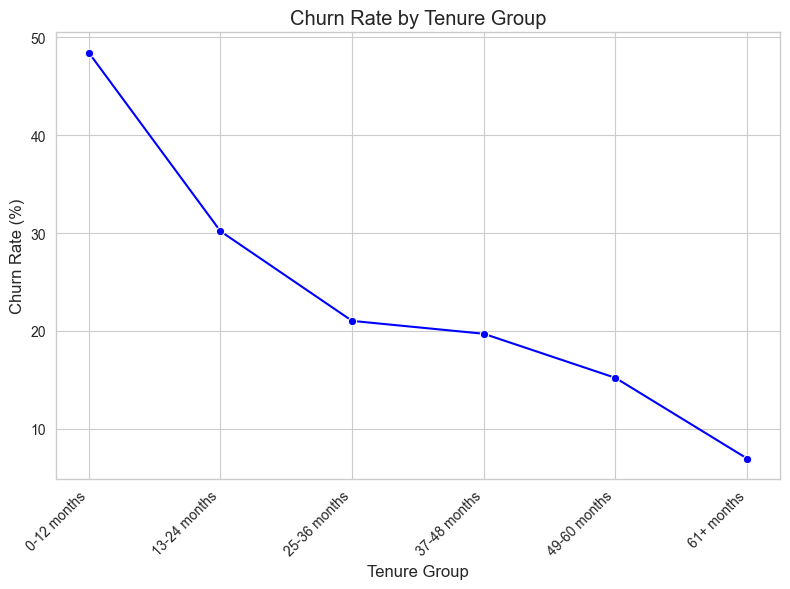

In [87]:
# Plotting churn rate against 'tenure_group'
plt.figure(figsize=(8, 6))
sns.lineplot(data=grouped3, x=grouped3.index, y='Churn_rate', marker='o', linestyle='-', color='b')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure Group')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

### What role do additional services (e.g., online security, tech support, streaming TV, etc.) play in reducing customer churn? Are customers with more services less likely to churn?

In [88]:
grouped8 = pd.crosstab(index=[df_train['OnlineSecurity'], df_train['OnlineBackup'], df_train['DeviceProtection'], df_train['TechSupport'], df_train['StreamingTV'], df_train['StreamingMovies']], columns=df_train['Churn'])
grouped8['Churn_rate']=(grouped8['Yes']/ (grouped8['Yes'] + grouped8['No']))*100
print(grouped8)

Churn                                                                                  No  \
OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        
No             No           No               No          No          No               214   
                                                                     Yes              636   
                                                         Yes         No                49   
                                                                     Yes               57   
                                             Yes         No          No                55   
...                                                                                   ...   
Yes            Yes          Yes              No          Yes         Yes               58   
                                             Yes         No          No                53   
                                                                     Y

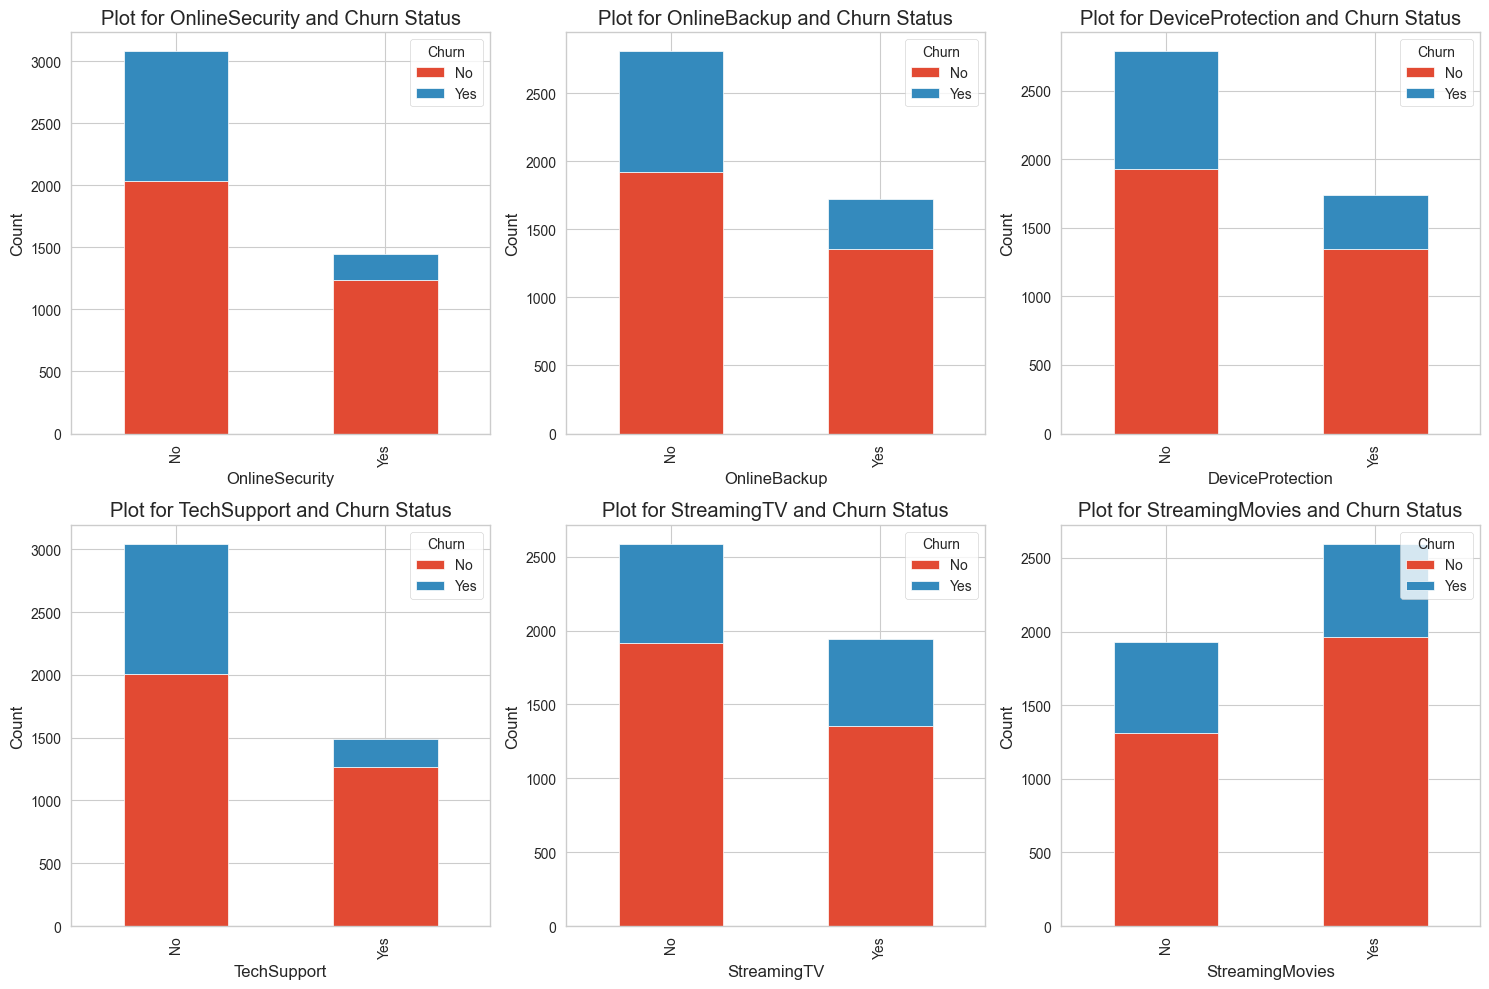

In [89]:
# lets visual the additional services and their churn status
grouped8 = grouped8.reset_index()  # Resetting index for better data handling

# Melt the dataframe for better visualization
melted_grouped8 = pd.melt(grouped8, id_vars=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn_rate'], var_name='Churn')

# List of categories to loop through and create stacked bar plots
categories = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a 2x3 grid for plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Adjust spacing between plots

# Loop through categories and create stacked bar plots in the grid
for idx, category in enumerate(categories):
    ax_row = idx // 3
    ax_col = idx % 3
    ax = axes[ax_row, ax_col]

    sorted_melted_grouped8 = melted_grouped8[melted_grouped8[category] != 'No internet service']
    sorted_melted_grouped8 = sorted_melted_grouped8.sort_values(by='Churn_rate', ascending=False)

    # Pivot the data to prepare for stacked bar plot
    pivot_table = sorted_melted_grouped8.pivot_table(index=category, columns='Churn', values='value', aggfunc='sum')

    pivot_table.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel(category)
    ax.set_ylabel('Count')
    ax.set_title(f'Plot for {category} and Churn Status')
    ax.legend(title='Churn', loc='upper right')

# Display the plots
plt.tight_layout()
plt.show()


### From the visualization we can see that most customers do not have access to the additional services. however, additional services play a siginificant role in reducing customer churn. we can see that customers with additional services are less likely to churn considering the rate of churn. the rate of churn for customers without additional is about 1/3 compared to the rate of churn for customers with additional services which is about 1/5. Hence, we conclude that the company should ensure that their customers have access to additional services to reduce churn.

### 5. Is there a correlation between the contract term (month-to-month, one year, two years) and churn rates? Are customers on long-term contracts less likely to churn compared to those on month-to-month contracts?

In [90]:
# first lets group our data by contract term and churn
grouped9=pd.crosstab(df_train['Contract'],df_train.Churn)
grouped9['Churn_rate']=(grouped9['Yes']/ (grouped9['Yes'] + grouped9['No']))*100
print(grouped9)


Churn             No   Yes  Churn_rate
Contract                              
Month-to-month  1513  1128   42.711094
One year         929   122   11.607992
Two year        1206    30    2.427184


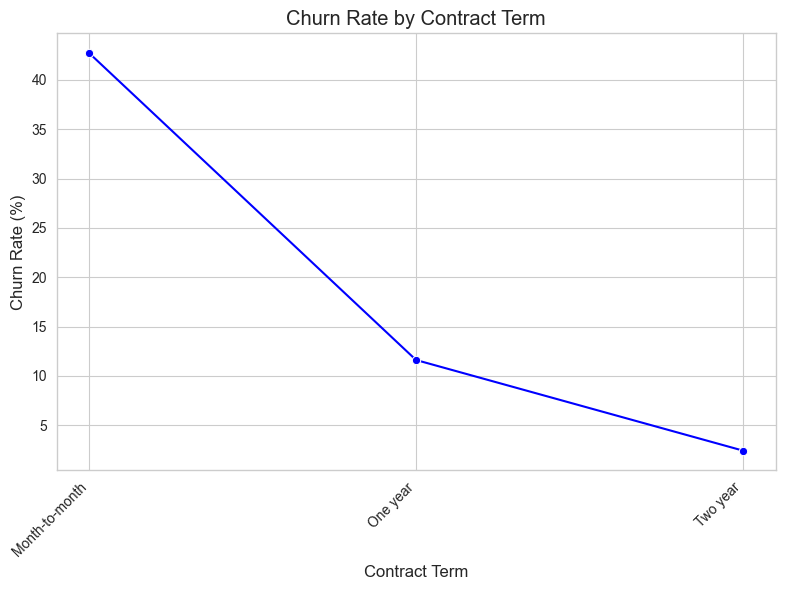

In [91]:
# Plotting churn rate against 'contract'
plt.figure(figsize=(8, 6))
sns.lineplot(data=grouped9, x=grouped9.index, y='Churn_rate', marker='o', linestyle='-', color='b')
plt.xlabel('Contract Term')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Contract Term')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

### From the visualization we can see that customers on long-term contracts are less likely to churn compared to those on month-to-month contracts. Thus the company should make their long term contracts attractive to customers to encourage them to sign up for one year or two year contracts.

## multivariate analysis

In [92]:
df_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

<Axes: >

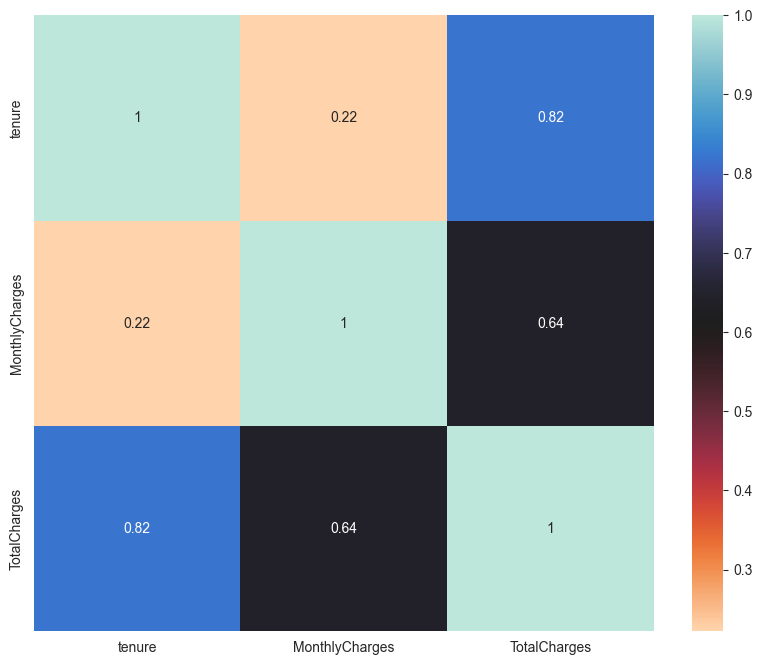

In [93]:
# now lets look at the relationship between numeric columns
# select numeric columns
df1=df_train.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn', 'tenure_group'], axis=1)
df1.columns

correlation = df1.corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(correlation, annot = True,cmap='icefire_r')

In [94]:
# performing feature selection
coff=abs(correlation['tenure'])
coff=coff[coff>0.02]
coff.sort_values(ascending=False)

tenure            1.000000
TotalCharges      0.822079
MonthlyCharges    0.222030
Name: tenure, dtype: float64

### we can see that the number of months the customer has stayed with the company(tenure) has high correlation of 0.82 with the total amount charged to the customer(TotalCharges) compared to the amount charged to the customer monthly(MonthlyCharges). Hence, the tenure period of a customers is determined by long term charges compared to monthly charges

### Hypothesis Testing

In [95]:
gc=pd.crosstab(df_train.Contract,df_train.Churn)
gc

Churn,No,Yes
Contract,,
Month-to-month,1513,1128
One year,929,122
Two year,1206,30


In [96]:
chi_2,p_value,gol,frequency=chi2_contingency(gc,correction=False)
alpha=0.05
print('level of significance=%.2f,p_value=%.2f,chi_2=%.2f'%(alpha,p_value,chi_2))

level of significance=0.05,p_value=0.00,chi_2=854.00


### Since the p-value is less than alpha, we reject Ho and conclude that is there is a statistical significance association between Churn and Contract.

## Modelling